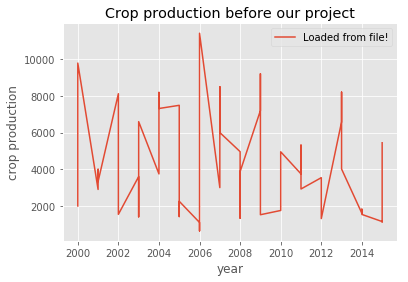

In [50]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('C:/Users/Shravani/Desktop/Hackathon/data.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
#plt.ylim(2000,2014) 
#plt.xlim(2000,10000)
plt.xlabel('year')
plt.ylabel('crop production')
plt.title('Crop production before our project')
plt.legend()
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# fix random seed for reproducibility
#initializing a value for prediction
numpy.random.seed(7)

In [4]:
dataframe = pandas.read_csv('C:/Users/Shravani/Desktop/Hackathon/crop-data.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

31 16


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 2s - loss: 30935540.7586
Epoch 2/200
 - 0s - loss: 30093994.2759
Epoch 3/200
 - 0s - loss: 29303747.8664
Epoch 4/200
 - 0s - loss: 28508204.1983
Epoch 5/200
 - 0s - loss: 27768120.0862
Epoch 6/200
 - 0s - loss: 26977713.6121
Epoch 7/200
 - 0s - loss: 26206715.0345
Epoch 8/200
 - 0s - loss: 25434577.8621
Epoch 9/200
 - 0s - loss: 24677387.8583
Epoch 10/200
 - 0s - loss: 23980479.5409
Epoch 11/200
 - 0s - loss: 23243857.4588
Epoch 12/200
 - 0s - loss: 22569187.8384
Epoch 13/200
 - 0s - loss: 21931223.8631
Epoch 14/200
 - 0s - loss: 21281543.4952
Epoch 15/200
 - 0s - loss: 20703070.8470
Epoch 16/200
 - 0s - loss: 20112114.3707
Epoch 17/200
 - 0s - loss: 19571224.9052
Epoch 18/200
 - 0s - loss: 19041766.2694
Epoch 19/200
 - 0s - loss: 18577239.5183
Epoch 20/200
 - 0s - loss: 18121006.5086
Epoch 21/200
 - 0s - loss: 17707952.8276
Epoch 22/200
 - 0s - loss: 17332547.6142
Epoch 23/200
 - 0s - loss: 16992458.7198
Epoch 24/200
 - 0s - loss: 16687580.7519
Epoch 25/200
 - 0s - loss

Epoch 199/200
 - 0s - loss: 14938546.6121
Epoch 200/200
 - 0s - loss: 14937424.1250


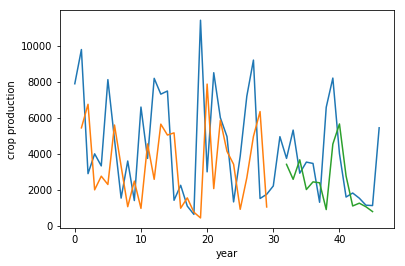

In [9]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('year')
plt.ylabel('crop production')
plt.show()